# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

(c) Grafica $w(x)$ en el rango $[0,1]$

(d) Integra de manera indefinida $y(x)$ y luego evalúala desde $0$ a $1$.

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

### Solución

In [17]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt 
import math

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \sin(x)
$$

$$
z(x) = \cos(x)
$$

$$
w(x) = \frac{1}{\cos(x) + \sin(2x)}
$$

In [32]:
x = Symbol("x")
y = Function("y")(x)
z = Function("z")(x)
w = Function("w")(x)

y = sin(x)
z = cos(x)
w = 1/(cos(x)+sin(2*x))

In [19]:
print ("y(x)=",y)
print ("z(x)=",z)
print ("w(x)=",w)

y(x)= sin(x)
z(x)= cos(x)
w(x)= 1/(sin(2*x) + cos(x))


(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [41]:
g = y*z
gder = g.diff(x) #Usar función de derivada del paquete 
gder

-sin(x)**2 + cos(x)**2

(c) Grafica $w(x)$ en el rango $[0,1]$

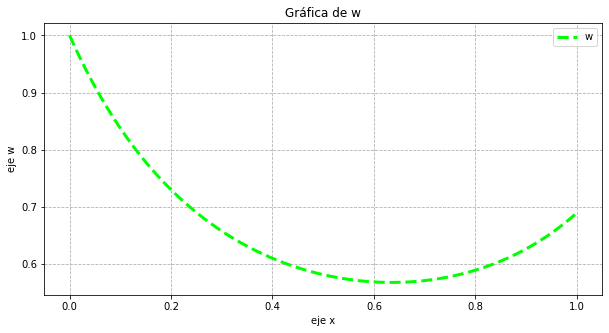

In [43]:
s = np.linspace (0,1,200) #Límites del eje x
w = 1/(np.cos(s)+np.sin(2*s)) #función w
fig = plt.figure(figsize = (10,5)) # tamaño de gráfica 
plt.plot(s,w, color ='lime', linestyle ='dashed', linewidth=3, label="w") #ajustes de líneas
plt.title('Gráfica de w') #título
plt.xlabel('eje x') #nombre de eje x
plt.ylabel('eje w') #nombre de eje y 
plt.legend(loc="best")
plt.grid(alpha =1, linestyle ='--') #cuadrícula

(d) Integra de manera indefinida $y(x)$ y luego evalúala desde $0$ a $1$.

In [23]:
#Integración indefinida respecto a x
integrate(g,x) 

sin(x)**2/2

In [24]:
#Evaluación en integración indefinida en 0 a 1
integrate (g,(x,0,1))

sin(1)**2/2

(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

In [25]:
#Límite de y cuando x tiende a 0
limit_y = limit(y, x, 0)  
limit_y

0

In [26]:
# Límite de z cuando x tiende a 0
limit_z = limit(z, x, 0)  
limit_z

1

In [29]:
# Límite de g cuando x tiende a 0
limit_g = limit(g, x, 0)  
limit_g

0

In [33]:
# Límite de w cuando x tiende a 0
limit_w = limit(w, x, 0)  
limit_w

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [35]:
#Serie Taylor de Orden 3 de y
Eq(y,y.series(x))

Eq(sin(x), x - x**3/6 + x**5/120 + O(x**6))

In [37]:
#Serie Taylor de Orden 3 de y
Eq(z,z.series(x))

Eq(cos(x), 1 - x**2/2 + x**4/24 + O(x**6))

<div class="alert alert-info">
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

In [55]:
#Runge-Kutta de orden 2
def RK2(y, t, dt, derivadas):
    k0 = dt*derivadas(y, t)
    k1 = dt*derivadas(y + k0, t + dt)
    y_next = y + 0.5*(k0 + k1)
    
    return y_next

In [56]:
a=.13
b=.2
c=6.5

In [100]:
#Creamos los estados 
def Rossler (parte, time):
    p0= -parte[1]-parte[2]
    p1= parte[0]+a*parte[1]
    p2= b+parte[2]*(parte[0]-c)
    return np.array([p0,p1,p2])

In [101]:
#Condiciones Iniciales
Con = np.zeros([N,3])
Con[0,0]=0
Con[0,1]=0
Con[0,2]=0

N = 1000 #iteraciones 
tau = 100 #tiempo de la simulación
time = np.linspace(0,tau,N)
dt = tau/(float)(N-1)  # tamaño del paso

In [102]:
#Método
def Kutta(Con, time, dt):
    for j in range(N-1):
        Con[j+1] = RK2(Con[j],time[j],dt,Rossler)
        
    x=np.array([Con[j,0] for j in Range(N)])
    y=np.array([Con[j,1] for j in Range(N)])
    z=np.array([Con[j,2] for j in Range(N)])
    return x,y,z

In [103]:
#lo que devuelve lo necesitamos para la gráfica 
x,y,z = Kutta(Con,time,dt)

Text(0.5, 0, 'tiempo')

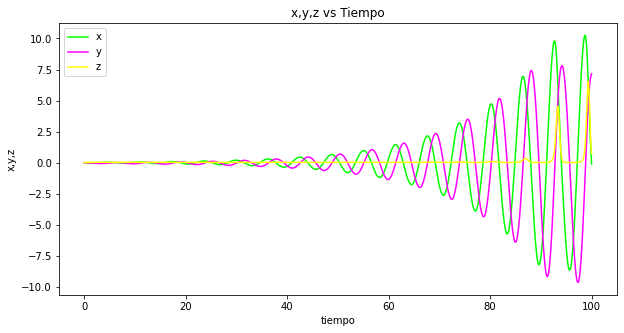

In [119]:
plt.figure(1,figsize=(10,5))
plt.plot(time,x,label="x",color='lime')
plt.plot(time,y,label="y",color="magenta")
plt.plot(time,z,label="z",color="yellow")
plt.legend(loc="best")
plt.title("x,y,z vs Tiempo")
plt.ylabel("x,y,z")
plt.xlabel("tiempo")

Text(0.5, 0.92, 'Atractor de Rössler en 3D')

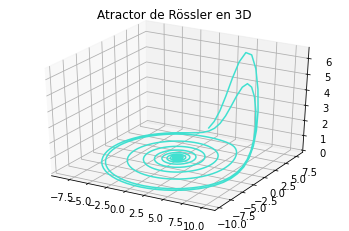

In [113]:
fig2=plt.figure()
fig3=fig2.add_subplot(1,1,1,projection="3d")
fig3.plot(x,y,z, color="turquoise")
fig3.set_title("Atractor de Rössler en 3D")